In [1]:
from time import time
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import os
import shutil
import pandas as pd
import keras

In [2]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [45]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.2,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,
                                                                brightness_range=(0.6,1.4),rotation_range=20)
train_generator = train_datagen.flow_from_directory(
        "train/",
        target_size=(32, 32),
        batch_size=50,
        class_mode='sparse',
        classes=class_names,subset="training")

validation_generator = train_datagen.flow_from_directory(
        "train/",
        target_size=(32, 32),
        batch_size=50,
        class_mode='sparse',
        classes=class_names,subset="validation")

Found 40000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [46]:
def split_dir():
    dataset = pd.read_csv("trainLabels.csv")
    file_names = list(dataset['id'].values)
    img_labels = list(dataset['label'].values)

    folders_to_be_created = np.unique(list(dataset['label']))
    for new_path in folders_to_be_created:
        if not os.path.exists("train/"+new_path):
            os.makedirs("train/"+new_path)

    folders = folders_to_be_created.copy()
    for f in range(len(file_names)):
        current_img = file_names[f]
        current_label = img_labels[f]
        shutil.move("train/"+str(current_img)+".png", "train/"+current_label)

In [49]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
model.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Activation('softmax'))

In [50]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")]
)

In [58]:
start=time()
history = model.fit(
        train_generator,
        steps_per_epoch=40000//50,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=10)
end=time()

Epoch 1/30
800/800 [==============================] - 378s 473ms/step - loss: 2.0189 - acc: 0.2442 - val_loss: 1.9715 - val_acc: 0.2420
Epoch 2/30
800/800 [==============================] - 306s 382ms/step - loss: 1.9716 - acc: 0.2659 - val_loss: 1.9534 - val_acc: 0.2800
Epoch 3/30
800/800 [==============================] - 311s 389ms/step - loss: 1.9452 - acc: 0.2775 - val_loss: 1.9386 - val_acc: 0.2800
Epoch 4/30
800/800 [==============================] - 310s 387ms/step - loss: 1.9170 - acc: 0.2900 - val_loss: 1.9210 - val_acc: 0.3120
Epoch 5/30
800/800 [==============================] - 306s 382ms/step - loss: 1.8992 - acc: 0.3030 - val_loss: 1.8138 - val_acc: 0.3220
Epoch 6/30
800/800 [==============================] - 360s 450ms/step - loss: 1.8753 - acc: 0.3081 - val_loss: 1.7884 - val_acc: 0.3340
Epoch 7/30
800/800 [==============================] - 430s 537ms/step - loss: 1.8746 - acc: 0.3081 - val_loss: 1.8617 - val_acc: 0.3300
Epoch 8/30
800/800 [============================

KeyboardInterrupt: 

In [52]:
print((end-start)//60)

19.0


In [53]:
def plot(losses, accuracies, subplot_title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
  
    ax1.plot(losses)
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    
    ax1.set_title(subplot_title[0])
  
    ax2.plot(accuracies)
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title(subplot_title[1])
    
    plt.show()

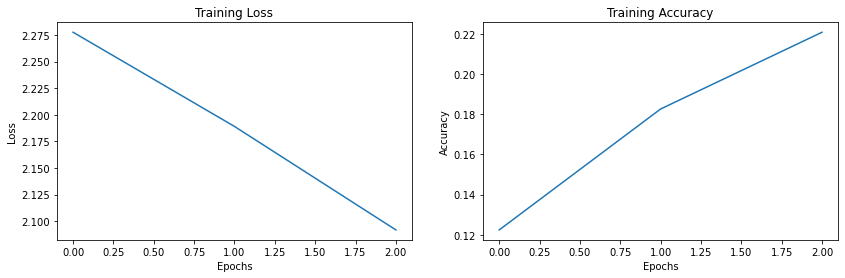

In [56]:
# Training
plot(history.history['loss'], 
     history.history['acc'], 
     subplot_title=['Training Loss', 'Training Accuracy']
    )

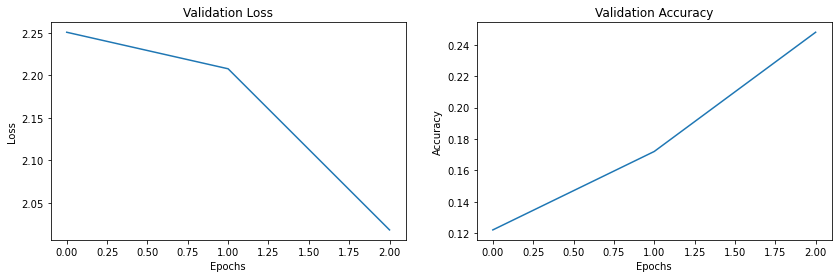

In [57]:
# Validation
plot(history.history['val_loss'], 
     history.history['val_acc'], 
     subplot_title=['Validation Loss', 'Validation Accuracy']
    )

In [2]:
iterator=tf.keras.preprocessing.image.DirectoryIterator(
    "./", image_data_generator=None, target_size=(32, 32),
    color_mode='rgb', classes=["test"], class_mode=None,
    batch_size=1000, shuffle=False, seed=None, data_format=None, save_to_dir=None,
    save_prefix='', save_format='png', follow_links=False,
    subset=None, interpolation='nearest', dtype=int
)


Found 300000 images belonging to 1 classes.


In [3]:
start=time()
img_all=iterator.next()
end=time()
print((end-start))

0.3457608222961426


In [4]:
for i in range(1,300000//1000):
    if i%3 ==0:
        print(i)
    img2=iterator.next()
    img_all=np.concatenate((img_all,img2))

3
6
9
12
15
18
21
24
27
30
33
36
39
42
45
48
51
54
57
60
63
66
69
72
75
78
81
84
87
90
93
96
99
102
105
108
111
114
117
120
123
126
129
132
135
138
141
144
147
150
153
156
159
162
165
168
171
174
177
180
183
186
189
192
195
198
201
204
207
210
213
216
219
222
225
228
231
234
237
240
243
246
249
252
255
258
261
264
267
270
273
276
279
282
285
288
291
294
297


In [6]:
#np.save("test_tensor.npy",img_all)

In [52]:
img_all=img_all.astype("int8")

In [53]:
np.save("test_tensor8.npy",img_all)

In [54]:
img_all=np.load("test_tensor8.npy")

In [56]:
img_all=img_all.astype("int16")

In [63]:
img_all=np.mod(img_all,256)

In [46]:
import matplotlib.pyplot as plt

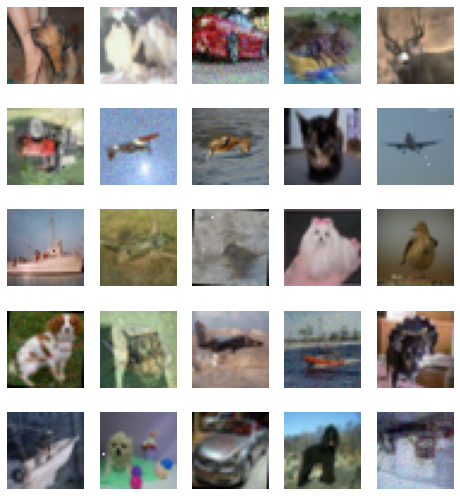

In [64]:
# pick 25 random images and plot
idxs = np.random.randint(img_all.shape[0], size=25)
images = img_all[idxs]
#labels = y_train[idxs]
classnames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig, axes = plt.subplots(5,5, figsize=(8,9))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.axis('off')
    #idx = labels[i]
    #ax.set_title(classnames[idx])
  
plt.show()